# EDA Cleaned

欄位說明:

-   PassengerId: 乘客編號
-   Survived: 是否存活
-   Pclass: 艙等
-   Name: 姓名
-   Sex: 性別
-   Age: 年齡
-   SibSp: 同行兄弟姊妹/配偶數
-   Parch: 同行父母/子女數
-   Ticket: 票號
-   Fare: 船票價格
-   Cabin: 客艙編號
-   Embarked: 登船港口

## 載入套件與基本設定

In [14]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 載入資料

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


## 檢查特徵與生存關係

### 艙等和生存的關係

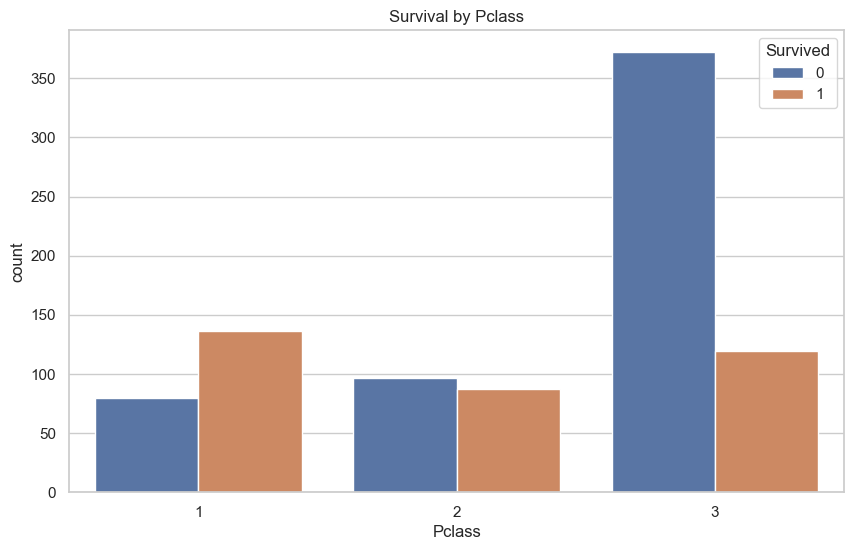

In [15]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Pclass")
plt.show()

### 性別和生存的關係

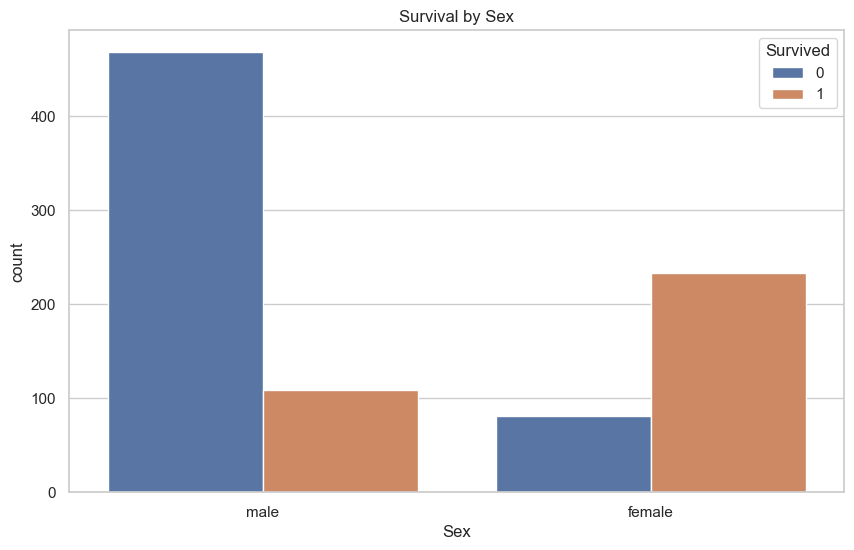

In [16]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

### 登船港口和生存的關係

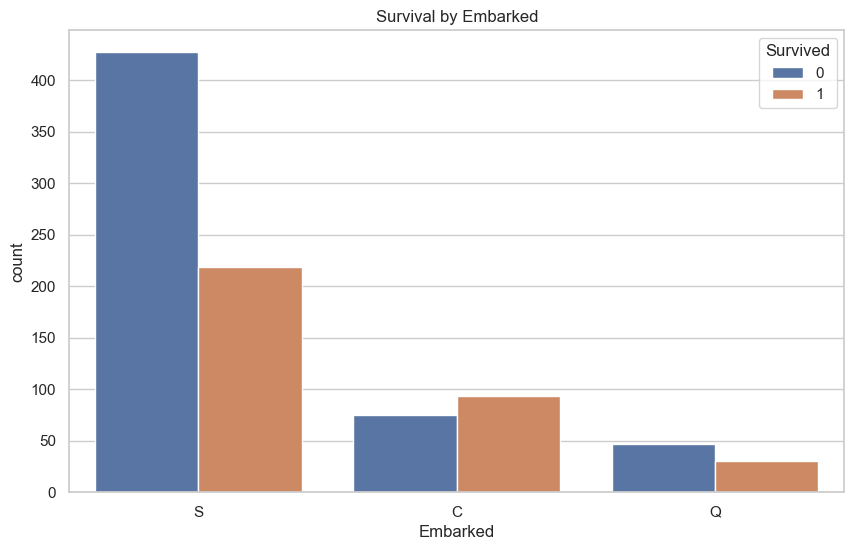

In [18]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title("Survival by Embarked")
plt.show()

### 年齡和生存的關係

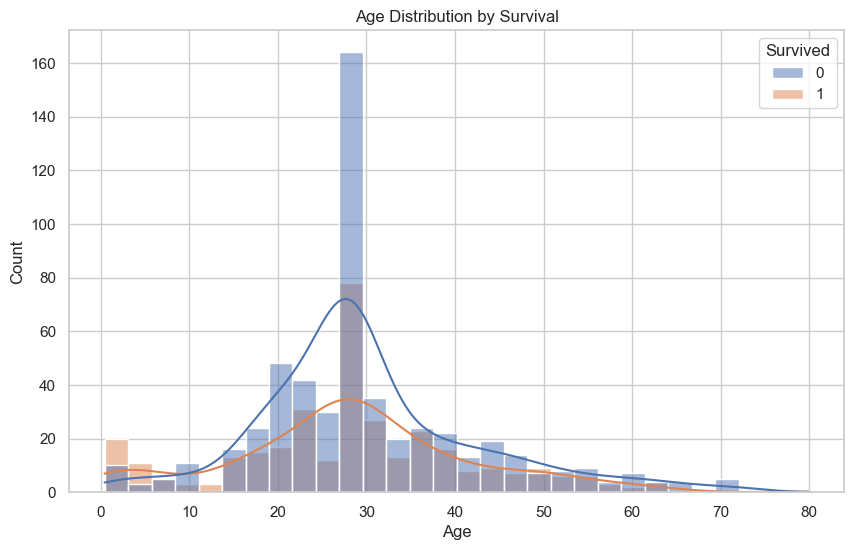

In [19]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

### 船票價格和生存的關係

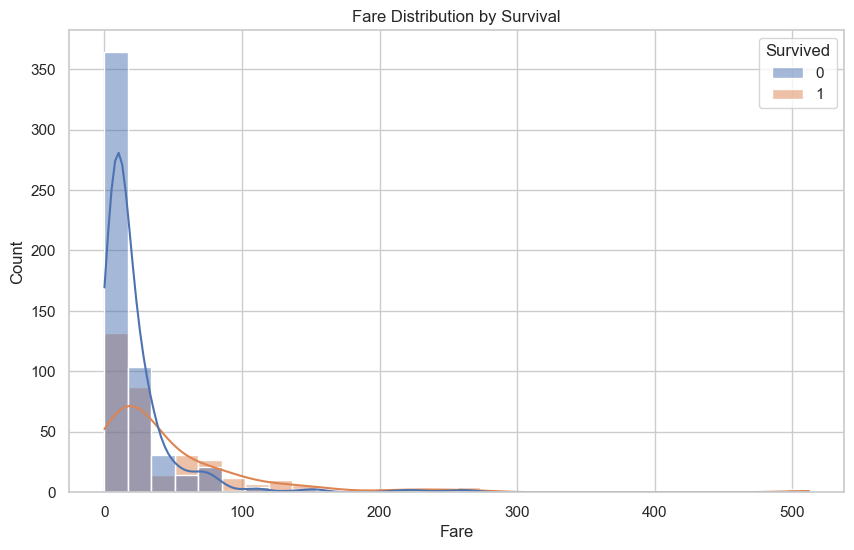

In [20]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

### 家庭人數和生存的關係

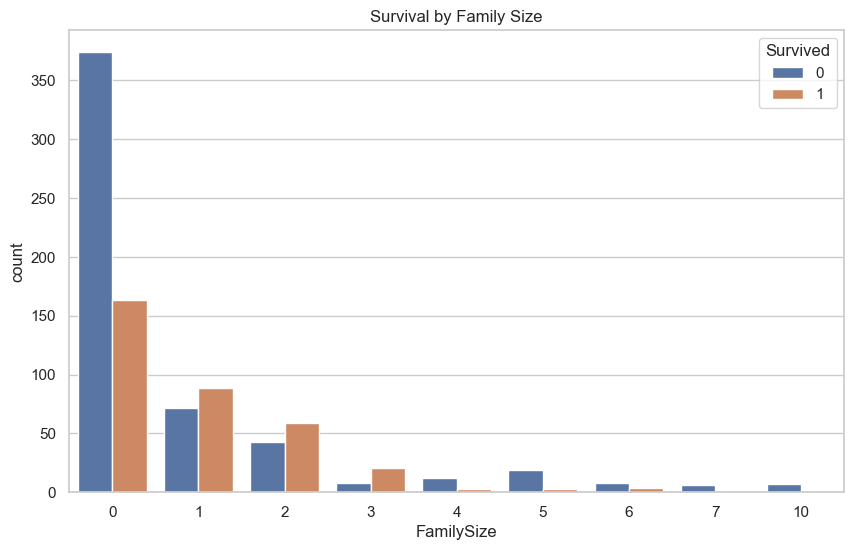

In [21]:
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title("Survival by Family Size")
plt.show()

### 相關係數圖

各特徵平均值 by Survived:
Survived              0           1
PassengerId  447.016393  444.368421
Pclass         2.531876    1.950292
Age           30.028233   28.291433
Fare          22.117887   48.395408
FamilySize     0.883424    0.938596


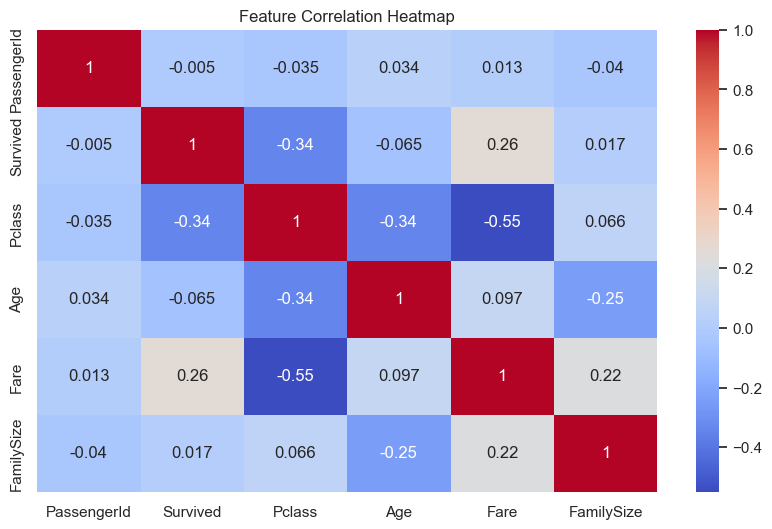

In [23]:
print("各特徵平均值 by Survived:")
print(train_df.groupby('Survived').mean(numeric_only=True).T)

# Correlation heatmap
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()